In [9]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Installed Graphviz using Pip3

In [10]:
data_file_path = '/Users/roos/Data/all_trials_noNaN_CTET2.csv'
data_file = pd.read_csv(data_file_path)

data_ctet = data_file[['Age', 'Gender', 'MEQ_type', 'PSQI','9A00000045146841',
       'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
       'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results']]

In [11]:
#Encode categorical variables
#Gender
encoder = LabelEncoder()
label_encoder_gender = encoder.fit(data_ctet['Gender'])
print("gender classes:", label_encoder_gender.classes_)
integer_classes_gender = label_encoder_gender.transform(label_encoder_gender.classes_)
print("Gender integer classes", integer_classes_gender)
code = label_encoder_gender.transform(data_ctet['Gender'])
data_ctet['Gender'] = code

# MEQ_type
label_encoder_MEQ = encoder.fit(data_ctet['MEQ_type'])
print("MEQ classes:", label_encoder_MEQ.classes_)
integer_classes_MEQ = label_encoder_MEQ.transform(label_encoder_MEQ.classes_)
print("MEQ> integer classes", integer_classes_MEQ)
code_MEQ = label_encoder_MEQ.transform(data_ctet['MEQ_type'])
data_ctet['MEQ_type'] = code_MEQ

gender classes: ['female' 'male']
Gender integer classes [0 1]
MEQ classes: ['evening' 'intermediate' 'morning']
MEQ> integer classes [0 1 2]


In [12]:
# Splitting the data
X = data_ctet.drop('results', axis=1).values
Y = data_ctet['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (4050, 13)
Y shape: (4050,)


In [13]:
dt = DecisionTreeClassifier(max_depth=5, random_state=33)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=33)

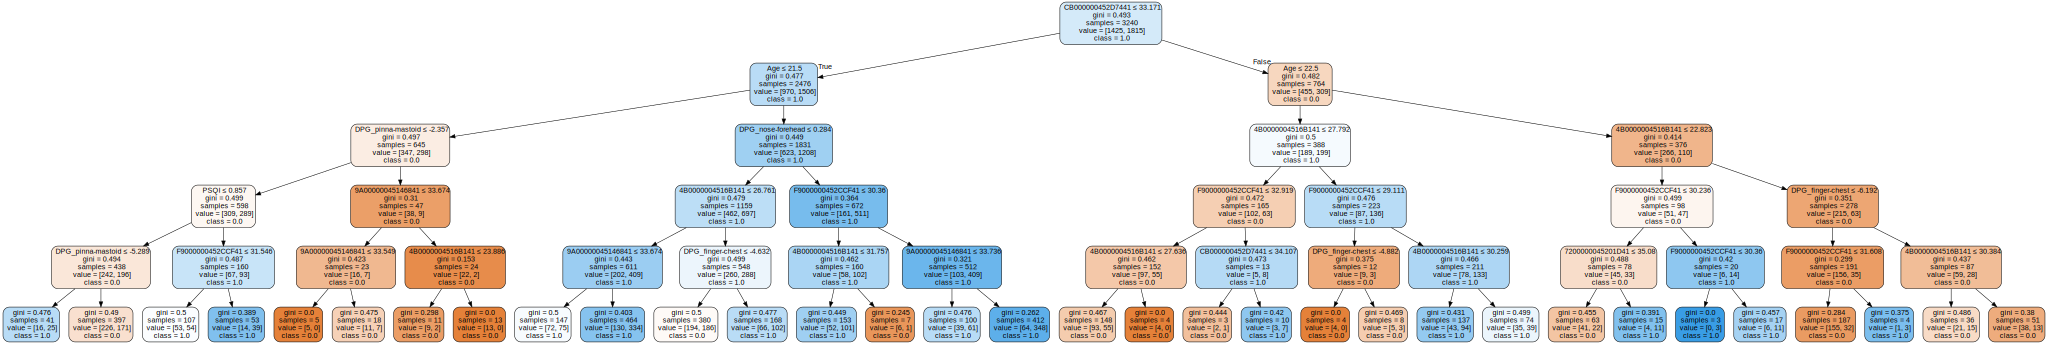

In [14]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_ctet.drop('results', axis=1).columns,
                                   class_names=['0.0', '1.0'],
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render('model3.gv', view=True)
graph

In [15]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

# Building a forest
random_forest2 = RandomForestClassifier(n_estimators=100, random_state=33, max_depth=5)
random_forest2.fit(X_train, Y_train)

# Print hit rate
print("Hit rate train", Y_train.sum()/(len(Y_train)))
print("Hit rate test", Y_test.sum()/len(Y_test))
# Accuracy on Test
print("Optimised Training Accuracy is: ", random_forest2.score(X_train, Y_train))
# Accuracy on Train
print("Optimised Testing Accuracy is: ", random_forest2.score(X_test, Y_test))

Training Accuracy is:  0.8672839506172839
Testing Accuracy is:  0.5802469135802469
Hit rate train 0.5601851851851852
Hit rate test 0.5370370370370371
Optimised Training Accuracy is:  0.6583333333333333
Optimised Testing Accuracy is:  0.6333333333333333


In [16]:
fi2 = ''
final2 = ''
for i, column in enumerate(data_ctet.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})
    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2

Importance of feature Age:, 0.015
Importance of feature Gender:, 0.002
Importance of feature MEQ_type:, 0.004
Importance of feature PSQI:, 0.012
Importance of feature 9A00000045146841:, 0.068
Importance of feature F9000000452CCF41:, 0.109
Importance of feature 76000000452C9741:, 0.061
Importance of feature 7200000045201D41:, 0.043
Importance of feature 4B0000004516B141:, 0.159
Importance of feature CB000000452D7441:, 0.116
Importance of feature DPG_finger-chest:, 0.174
Importance of feature DPG_nose-forehead:, 0.160
Importance of feature DPG_pinna-mastoid:, 0.076


,index,Variable,Feature Importance Score
0,10,DPG_finger-chest,0.173755
1,11,DPG_nose-forehead,0.159984
2,8,4B0000004516B141,0.159291
3,9,CB000000452D7441,0.116114
4,5,F9000000452CCF41,0.109119
5,12,DPG_pinna-mastoid,0.076339
6,4,9A00000045146841,0.067954
7,6,76000000452C9741,0.061115
8,7,7200000045201D41,0.043357
9,0,Age,0.015002


In [19]:
fi3 = ''
final3 = ''
for i, column in enumerate(data_ctet.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest2.feature_importances_[i]))
    fi3 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest2.feature_importances_[i]]})
    try:
        final3 = pd.concat([final3, fi3], ignore_index=True)
    except:
        final3 = fi3

# Ordering the data
final_fi3 = final3.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi3

Importance of feature Age:, 0.065
Importance of feature Gender:, 0.009
Importance of feature MEQ_type:, 0.023
Importance of feature PSQI:, 0.056
Importance of feature 9A00000045146841:, 0.057
Importance of feature F9000000452CCF41:, 0.069
Importance of feature 76000000452C9741:, 0.094
Importance of feature 7200000045201D41:, 0.050
Importance of feature 4B0000004516B141:, 0.106
Importance of feature CB000000452D7441:, 0.135
Importance of feature DPG_finger-chest:, 0.115
Importance of feature DPG_nose-forehead:, 0.101
Importance of feature DPG_pinna-mastoid:, 0.121


,index,Variable,Feature Importance Score
0,9,CB000000452D7441,0.135280
1,12,DPG_pinna-mastoid,0.121283
2,10,DPG_finger-chest,0.115147
3,8,4B0000004516B141,0.106094
4,11,DPG_nose-forehead,0.100701
5,6,76000000452C9741,0.093549
6,5,F9000000452CCF41,0.068548
7,0,Age,0.065213
8,4,9A00000045146841,0.057037
9,3,PSQI,0.055796
